                                           Image Processing 5 Hewan Mamalia

                                                       Kelompok 1 
                                                      Kelas A1 2021
##### Anggota Kelompok :

##### Bayu Abdurosyid - 2109106003
##### Alif Maulana Setyawan  - 2109106002
##### Ananta Yusra Putra.A - 2109106024

link Dataset : <a href="https://www.kaggle.com/datasets/shiv28/animal-5-mammal">Animal -5 Mammal</a>

- Install package dibawah ini, yang akan digunakan untuk melakukan split folder yang akan digunakan untuk folder train dan validation

In [ ]:
!pip install split_folders

### Library Utama

In [ ]:
import tensorflow as tf
# Panggil Library untuk split
import splitfolders
import os

# **Data Collecting**

* Membuat Direktori Untuk Membaca Dataset

In [1]:
dir = 'D:/UNMUL/vscode/Kelompok1-A1_PA-KB-/dataset'

### Spliting Folder 80% training 20% validasi

- Hanya di gunakan sekali, jika sudah dilakukan spliting folder maka code ini tidak perlu di jalankan lagi.

In [ ]:
splitfolders.ratio(dir, output = 'D:/UNMUL/vscode/Kelompok1-A1_PA-KB-', ratio = (.8, .2))

# **Data Analysis and Visualization**

### Mengambil path dataset

In [2]:
animals = os.path.join(dir)
print(os.listdir(animals))

['cat', 'dog', 'ELEPHANT', 'HORSE', 'LION']


### Melihat Jumlah Data Gambar Beserta Rincian Resolusi Gambar

In [5]:
from PIL import Image

list_animals = os.listdir(animals)
total = 0
jumlah = []
for x in list_animals:
  dir = os.path.join(animals, x)
  y = len(os.listdir(dir))
  print(x+':', y)
  jumlah.append(y)
  total = total + y
  
  img_name = os.listdir(dir)
  for z in range(4):
    img_path = os.path.join(dir, img_name[z])
    img = Image.open(img_path)
    print('-',img.size)
  print('---------------')

print('\nTotal :', total)
     

cat: 3037
- (512, 512)
- (512, 512)
- (512, 512)
- (512, 512)
---------------
dog: 2927
- (512, 512)
- (512, 512)
- (512, 512)
- (512, 512)
---------------
ELEPHANT: 3040
- (800, 450)
- (64, 64)
- (2048, 1365)
- (64, 64)
---------------
HORSE: 3009
- (256, 256)
- (256, 256)
- (256, 256)
- (256, 256)
---------------
LION: 2984
- (64, 64)
- (64, 64)
- (64, 64)
- (2048, 1365)
---------------

Total : 14997


Dari analisa diatas dapat disimpulkan bahwa terdapat beberapa kelas yang memilki gambar dengan resolusi berbeda.

### Membuat Variabel Untuk Menentukan Resolusi Gambar

In [ ]:
# Resolusi/dimensi Width (w), high (h)
w = 150
h = 150

### Visualisasi Jumlah Dataset pada Diagram Batang
Setiap kelas mewakili absis atau sumbu x pada grafik, sementara jumlahnya mewakili sumbu y.

### Import Library Untuk Visualisasi

In [7]:
import matplotlib.pyplot as plt
import numpy as np

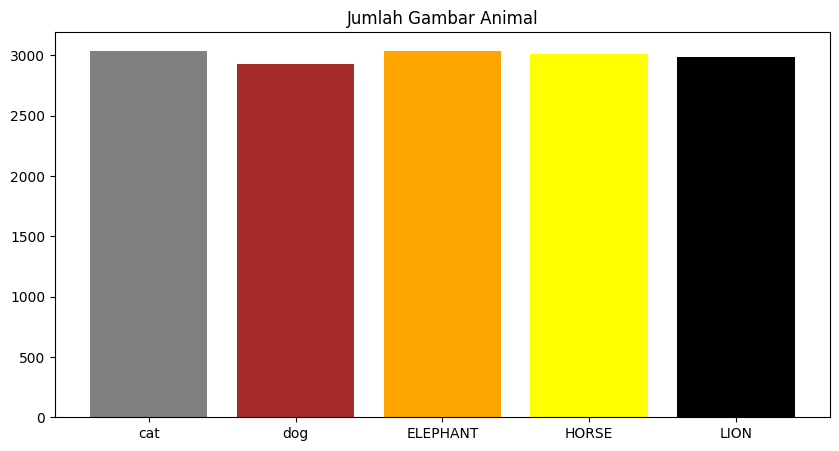

In [8]:
x = list_animals

plt.figure(figsize = (10,5))
plt.bar(x, jumlah, color=['gray', 'brown', 'orange', 'yellow', 'black'])
plt.title("Jumlah Gambar Animal")
plt.show()

Dari grafik diatas dapat disimpulkan bahwa jumlah data gambar dari setiap kelas cukup seimbang.

### Visualisasi Gambar Sebelum Augmentasi
Pada bagian berikut, akan dilihat beberapa sampel data gambar beserta kelasnya sebelum dilakukan pemrosesan lebih lanjut. Hal ini bertujuan untuk menganalisa kualitas dari data mentah yang tersedia.

<function matplotlib.pyplot.show(close=None, block=None)>

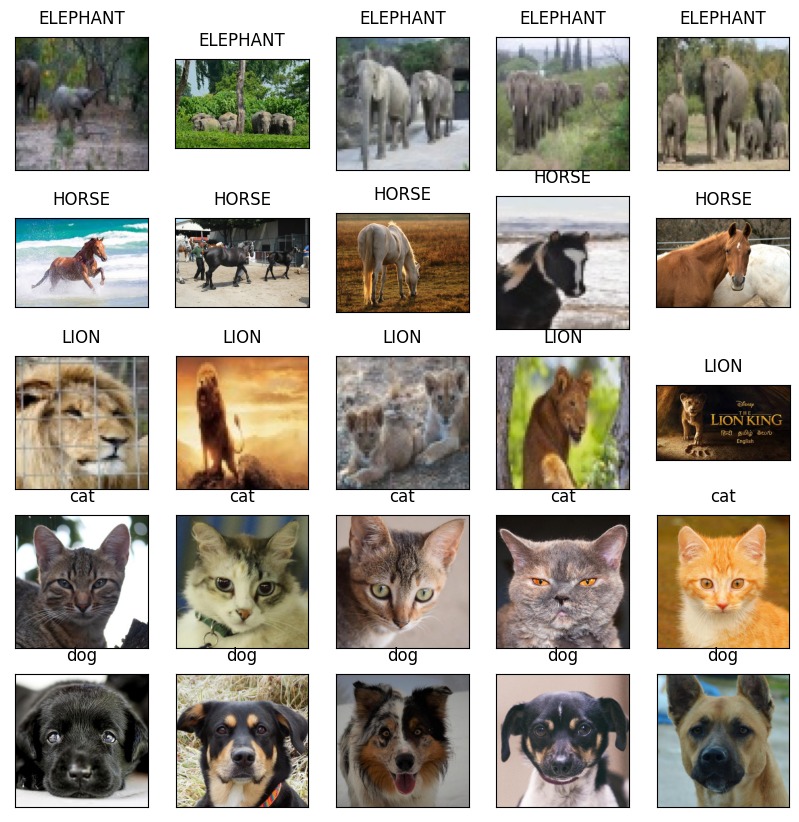

In [72]:
fig, ax = plt.subplots(5, 5, figsize=(10,10))
animals_sorted = sorted(list_animals)
animals_id = 0
for i in range(5):
  for j in range(5):
    try:
      animals_selected = animals_sorted[animals_id] 
    except:
      break
    if animals_selected == '.TEMP':
        continue
    animals_selected_images = os.listdir(os.path.join(animals, animals_selected))
    animals_selected_random = np.random.choice(animals_selected_images)
    img = plt.imread(os.path.join(animals, animals_selected, animals_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(animals_selected, pad=10, fontsize=12)
  animals_id += 1
    
plt.setp(ax, xticks=[],yticks=[])
plt.show

# **Data Preprocessing**

### Augmentasi Gambar
Augmentasi data merupakan proses memodifikasi atau memanipulasi suatu citra, sehingga citra asli dalam bentuk standar akan diubah bentuk dan posisinya.Rincian Augmentasi Gambar yang digunakan antara lain
- Normalisasi Gambar dengan Rescale
- Fill Mode menggunakan nearest untuk mengganti pixel gambar yang hilang dengan nilai pixel terdekat saat augmentasi
- Membalik gambar secara horizontal
- Memutar gambar dengan
- Menggeser gambar menurut lebar dan tinggi
- Distorsi kemiringan gambar 
- Random zoom pada gambar

### Membuat list berisi nama kelas


In [ ]:
class_names = ['elephant', 'horse', 'lion', 'cat', 'dog']

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator (
    rescale = 1./255,
    fill_mode = 'nearest',
    horizontal_flip = True,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.15,
)


### Flow Data
mendefinisikan darimana sumber datanya berasal yaitu dari folder lokal

* Batch size = jumlah training sample yang digunakan dalam satu batch untuk setiap iterasi/epoch.

In [ ]:
train_dataset = datagen.flow_from_directory(
    'D:/UNMUL/vscode/Kelompok1-A1_PA-KB-/train',
    class_mode='categorical',
    target_size = (w, h),
    batch_size = 256
)

validation_dataset = datagen.flow_from_directory(
    'D:/UNMUL/vscode/Kelompok1-A1_PA-KB-/val',
    class_mode='categorical',
    target_size = (w, h),
    batch_size = 256
)


Found 11995 images belonging to 5 classes.
Found 3000 images belonging to 5 classes.


### Visualisasi Setelah Augmentasi

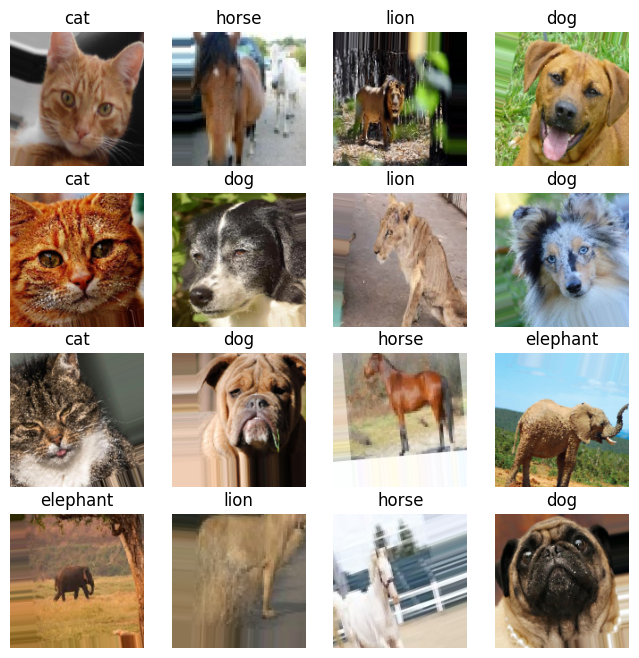

In [ ]:
plt.figure(figsize=(8, 8))

images, labels = train_dataset.next()

for i in range (16):
  plt.subplot(4, 4, i+1)
  plt.imshow(train_dataset[0][0][i])
  plt.title(class_names[tf.argmax(labels[i])])
  plt.axis('off')

# **Data Modelling**

##### Membuat Activation Layer
* Jenis Model = Sequential digunakan karena cocok digunakan untuk model yang memiliki satu input layer dan satu output layer

##### Layer yang digunakan
* Convolution = Menerapkan kernel konvolusi untuk memfilter gambar pada dimensi 3*3
* Pooling = (MaxPooling2D) menggunakan "Max Pooling" berfungsi untuk mengurangi resolusi dengan membuat gambar baru yang di dapat dari piksel tertinggi dari area tertentu gambar
* Dropout = Dropout merupakan proses mencegah terjadinya overfitting dan juga mempercepat proses learning. Dropout secara acak menonaktifkan neuron tertentu pada setiap pelatihan model, untuk mencegah model mempelajari noise.
* Flatten = Mengubah data training menjadi satu dimensi sebelum diolah ke layer dense
* Dense = layer neuron sederhana yang mana setiap neuron menerima input dari semua neuron pada layer sebelumnya, dan mengklasifikasikan gambar sebgai output

##### Activation Function 
* Relu = Rectified Linear Unit (ReLU) akan menghilangkan vanishing gradient dengan cara menerapkan fungsi aktivasi element sebagai f(x) = max⁡(0,x) alias aktivasi elemen akan dilakukan saat berada di ambang batas 0.
* Softmax = Fungsi Softmax menghitung probabilitas dari setiap kelas target atas semua kelas target yang memungkinkan dan akan membantu untuk menentukan kelas target untuk input yang diberikan.

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential(
    [
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(w, h, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.5),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(512, activation = 'relu'),
    layers.Dense(256, activation = 'relu'),
    layers.Dense(5, activation = 'softmax')
    ]
)

### Model Compile
* Optimizer = (adam) untuk menentukan algoritma stochastic gradient descent
* Loss = (categorical_crossentropy ) parameter loss untuk menentukan loss function
* Metrics = 'accuracy' parameter metrics untuk menentukan performa metric

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 36, 36, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       7

### CallBack
* fungsi callback disini adalah untuk mengehentikan pelatihan model ketika sudah mencapai akurasi lebih dari 95% sehingga tidak terjadi over fitting

In [ ]:
class callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = None):
    if (logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95):
      print('Akurasi telah mencapai 95%!')
      self.model.stop_training = True

### Melatih Model 
Disini model dilatih sebanyak 100 epoch, dan menggunakan 5 validation steps atau jumlah batch sampel dari data validasi untuk mengevaluasi hasil training di setiap epoch

In [ ]:
history = model.fit(
    train_dataset,
    validation_data = validation_dataset,
    validation_steps = 5,
    epochs = 100,
    callbacks = [callback()]    
)

Epoch 1/100
47/47 [==============================] - 246s 5s/step - loss: 1.5880 - accuracy: 0.2524 - val_loss: 1.5400 - val_accuracy: 0.3125
Epoch 2/100
47/47 [==============================] - 239s 5s/step - loss: 1.4496 - accuracy: 0.3686 - val_loss: 1.3857 - val_accuracy: 0.4148
Epoch 3/100
47/47 [==============================] - 235s 5s/step - loss: 1.2831 - accuracy: 0.4594 - val_loss: 1.1332 - val_accuracy: 0.5289
Epoch 4/100
47/47 [==============================] - 234s 5s/step - loss: 1.0321 - accuracy: 0.5838 - val_loss: 0.8972 - val_accuracy: 0.6313
Epoch 5/100
47/47 [==============================] - 235s 5s/step - loss: 0.9437 - accuracy: 0.6208 - val_loss: 0.8188 - val_accuracy: 0.6781
Epoch 6/100
47/47 [==============================] - 234s 5s/step - loss: 0.8312 - accuracy: 0.6650 - val_loss: 0.7576 - val_accuracy: 0.6914
Epoch 7/100
47/47 [==============================] - 232s 5s/step - loss: 0.7461 - accuracy: 0.7021 - val_loss: 0.6496 - val_accuracy: 0.7406
Epoch 

 * Dari hasil training diatas, didapat akurasi sebesar 93% dan akurasi validation sebesar 93% juga.
 * Sehingga dapat disimpulkan bahwa model berhasil belajar hingga didapatkan model yang good fit.

### Save Model
* menyimpan hasil pelatihan model dalam bentuk format file h.5

In [ ]:
model.save('gfgModel.h5')
print('Model Saved!')

Model Saved!


# **Model Evaluation**

### Visualisasi

* Akurasi

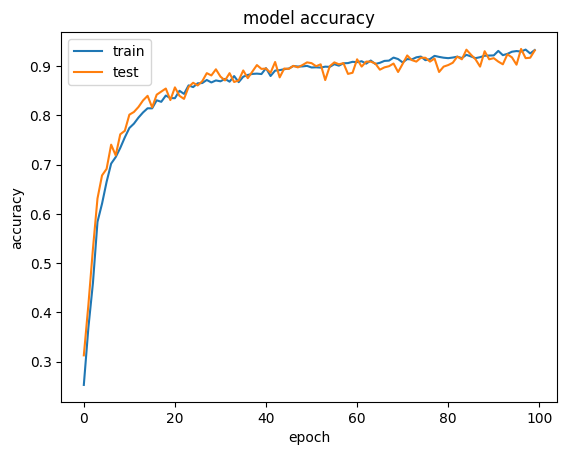

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

* Loss

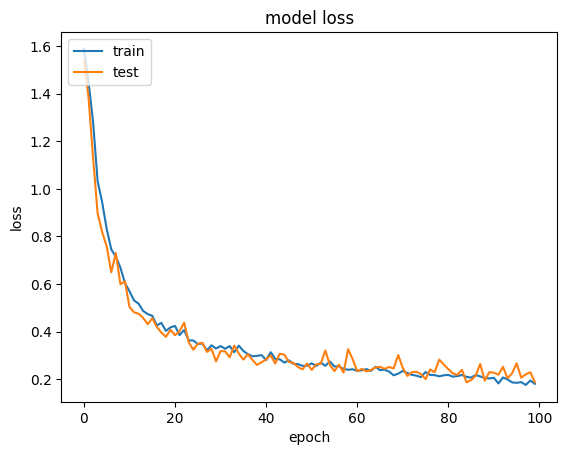

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### Evaluasi

In [ ]:
model.evaluate(validation_dataset)

12/12 [==============================] - 22s 2s/step - loss: 0.2126 - accuracy: 0.9240


[0.2126031070947647, 0.9240000247955322]

### Load Model 
* Mengambil data pelatihan model dari save model h.5 

In [ ]:
from keras.models import load_model
model = load_model('gfgModel.h5')
print('Model Load!')

Model Load!


### Prediksi 

1/1 [==============================] - 0s 21ms/step
lion


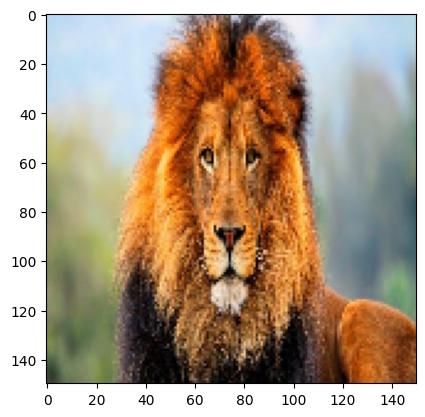

In [ ]:
import numpy as py
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image

dir = 'D:/UNMUL/vscode/Kelompok1-A1_PA-KB-/data-prediksi-google/lion.JPG'

img = image.load_img(dir, target_size = (w, h))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = py.expand_dims(x, axis = 0)

predictions = model.predict(x)
score = tf.nn.softmax(predictions[0])

print("{}" .format(class_names[py.argmax(score)]))